In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from subprocess import check_output

In [8]:
data = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# Clean the data
data.drop('id', axis=1, inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)

# Map Benign to 0 and Malignant to 1
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Scaling the dataset
data_scaled = pd.DataFrame(preprocessing.scale(data.iloc[:, 1:32]))
data_scaled.columns = list(data.iloc[:, 1:32].columns)
data_scaled['diagnosis'] = data['diagnosis']
data_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [16]:
# Create the feature space
X = data_scaled.drop('diagnosis', axis=1).to_numpy()
y = data_scaled['diagnosis']

# create a 2D visualization for the clusters
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter=4000)
X_embedded = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.002s...
[t-SNE] Computed neighbors for 569 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.213676
[t-SNE] KL divergence after 2500 iterations: 0.862606


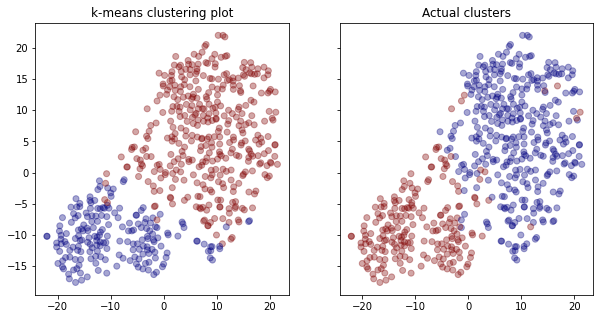

In [29]:
# Cluster using k-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)

Y = kmeans.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ax1.scatter(X_embedded[:,0], X_embedded[:,1], c=Y, cmap='jet', alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(X_embedded[:,0], X_embedded[:,1], c=y, cmap='jet', alpha=0.35)
ax2.set_title('Actual clusters')
plt.show()

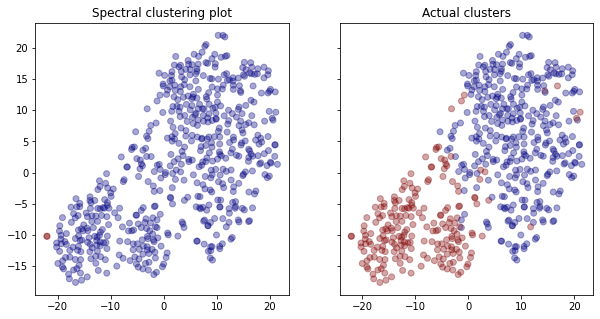

In [27]:
# cluster using Spectral clustering and visualize using Isomap
from sklearn.cluster import SpectralClustering

spec_cluster = SpectralClustering(n_clusters=2, random_state=42)
Y_sc = spec_cluster.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ax1.scatter(X_embedded[:,0], X_embedded[:,1], c=Y_sc, cmap='jet', alpha=0.35)
ax1.set_title('Spectral clustering plot')

ax2.scatter(X_embedded[:,0], X_embedded[:,1], c=y, cmap='jet', alpha=0.35)
ax2.set_title('Actual clusters')
plt.show()

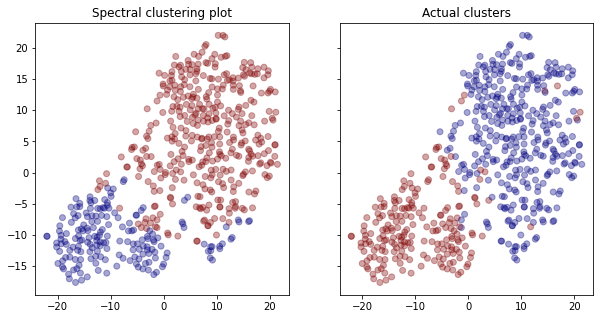

In [28]:
# Cluster using hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
aggC = AgglomerativeClustering(n_clusters=2)

Y_ac = aggC.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))

ax1.scatter(X_embedded[:,0], X_embedded[:,1], c=Y_ac, cmap='jet', alpha=0.35)
ax1.set_title('Spectral clustering plot')

ax2.scatter(X_embedded[:,0], X_embedded[:,1], c=y, cmap='jet', alpha=0.35)
ax2.set_title('Actual clusters')
plt.show()